In [20]:
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [21]:
df=pd.read_csv("stack-overflow-data.csv")

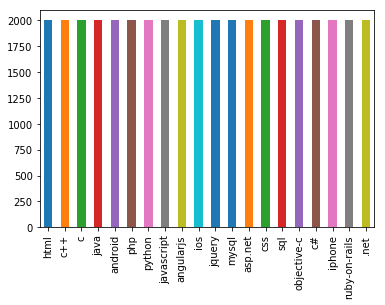

In [22]:
df['tags'].value_counts().plot('bar')

In [23]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [24]:
df.post=df.post.apply(clean_text)

In [25]:
X=df.post
Y=df.tags
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print(nb.predict_proba(y_pred)[0])
print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

[ 0.04953571  0.04928571  0.05046429  0.0505      0.05003571  0.05039286
  0.05021429  0.04964286  0.04939286  0.05046429  0.04960714  0.05021429
  0.04932143  0.05092857  0.05057143  0.05078571  0.05032143  0.04971429
  0.04864286  0.04996429]
accuracy 0.73075
               precision    recall  f1-score   support

         .net       0.60      0.66      0.62       613
      android       0.95      0.82      0.88       620
    angularjs       0.85      0.92      0.89       587
      asp.net       0.70      0.80      0.75       586
            c       0.75      0.87      0.81       599
           c#       0.72      0.53      0.61       589
          c++       0.81      0.76      0.78       594
          css       0.64      0.90      0.75       610
         html       0.57      0.56      0.56       617
          ios       0.55      0.67      0.60       587
       iphone       0.72      0.48      0.58       611
         java       0.83      0.78      0.80       594
   javascript       0.

In [32]:
nb.predict([X_test.values[0]])
print(nb.predict_proba([X_test.values[0]])[0])

[ 0.03229244  0.0231701   0.08038202  0.04095215  0.04080199  0.06731871
  0.27493766  0.02903803  0.03852241  0.01454196  0.01155905  0.06357352
  0.06255709  0.04415643  0.00949812  0.03485001  0.0545238   0.02480551
  0.04558697  0.00693202]
